In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import imutils

import easyocr
import pytesseract
pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'

import time
from datetime import timedelta

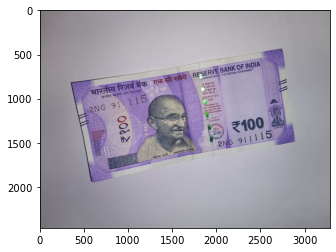

In [3]:
demo_image = cv2.imread("C:/Users/kevin/Desktop/Project_Resources/TEST/100_re_skew.jpg")
plt.imshow(cv2.cvtColor(demo_image, cv2.COLOR_BGR2RGB))

In [11]:
# MASTER FUNCTION
def SERIAL_NUMBER_EXTRACTION(name, crop_test_condition):
    try:
        def contours(image, draw_condition):
            h,w,c = image.shape
            image = cv2.resize(image, (int(w/3), int(h/3))) 
        
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            edged = cv2.Canny(gray, 100, 255)
            kernel = np.ones((5,5),np.uint8)
            
            # BILATERAL FILTERS    
            #erosion = cv.erode(img,kernel,iterations = 1) #EROSSION
            edged = cv2.dilate(edged,kernel,iterations = 1) #DILATION
            #opening = cv.morphologyEx(img, cv.MORPH_OPEN, kernel) 
            #closing = cv2.morphologyEx(img, cv.MORPH_CLOSE, kernel) #CLOSING
            #gradient = cv.morphologyEx(img, cv.MORPH_GRADIENT, kernel) #GRADIENT
        
            contours, hierarchy = cv2.findContours(edged, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
            cnt = contours[4]
            cnts = cv2.findContours(edged.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            cnts = imutils.grab_contours(cnts)
            cnts = sorted(cnts, key = cv2.contourArea, reverse = True)[:5]
            # loop over the contours
            for c in cnts:
                peri = cv2.arcLength(c, True)
                approx = cv2.approxPolyDP(c, 0.02 * peri, True)
                # can assume that we have found our screen
                if len(approx) == 4:
                    screenCnt = approx
                    break
            drawed_image = image
            if draw_condition == 1:
                drawed_image = cv2.drawContours(drawed_image, [screenCnt], 0, (0, 255, 0), 10)
            else:
                pass
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            return cnts, image, screenCnt, drawed_image
        
        
        # IMAGE ROTATION
        def skew(contours, image):
            a= contours
            # Calculate skew angle of an image
            def getSkewAngle(a) -> float:
                contours = a
                # Find largest contour and surround in min area box
                largestContour = contours[0]
                minAreaRect = cv2.minAreaRect(largestContour)
                # Determine the angle. Convert it to the value that was originally used to obtain skewed image
                angle = minAreaRect[-1]
                if angle < -45:
                    angle = 90 + angle
                return -1.0 * angle+90
            
            # Rotate the image around its center
            def rotateImage(cvImage, angle: float):
                newImage = cvImage.copy()
                (h, w) = newImage.shape[:2]
                center = (w // 2, h // 2)
                M = cv2.getRotationMatrix2D(center, angle, 1.0)
                newImage = cv2.warpAffine(newImage, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)
                #plt.imshow(newImage)
                return newImage
            
            # Deskew image
            def deskew(cvImage):
                angle = getSkewAngle(a)
                #print(angle)
                return rotateImage(cvImage, -1.0 * angle)
            
            try:
                de_skew_image = deskew(image)
                de_skew_HEIGHT, de_skew_WIDTH, channel = de_skew_image.shape
                assert de_skew_WIDTH > de_skew_HEIGHT
            except AssertionError:
                print("DE-SKEW ERROR")
                de_skew_image = image
            return de_skew_image
        
       # # FILE NAME _______________________________________________________________________
       # address = 'C:/Users/kevin/Desktop/TEST/' + name + ".jpg"
       # input_image = cv2.imread(address)
       # a, img, screen_cnt_1, draw = contours(input_image, 0)
       # sec=skew(a, input_image)
       # a_2, img_2, screen_cnt_2, draw_2 = contours(sec, 0)
       # #print(screen_cnt_1)
       # #print(screen_cnt_2)
       # # X, Y format
    
       # # FILE NAME _______________________________________________________________________    
        
        image_format = [".jpeg", ".png", ".jpg"]
        dummy = np.array([1, 2, 3, 4, 5])
        
        for i in range(len(image_format)):
    
            address = 'C:/Users/kevin/Desktop/Project_Resources/TEST/' + name + image_format[i]
            input_image = cv2.imread(address)
            if type(input_image) == type(dummy):
                break
            else:
                pass
    
        a, img, screen_cnt_1, draw = contours(input_image, 0)
        sec=skew(a, input_image)
        a_2, img_2, screen_cnt_2, draw_2 = contours(sec, 0)
#     # FILE NAME _______________________________________________________________________
        
        def sort_contours(image, de_skewed_contours):
            h, w, c = image.shape
            #print(int(h/2),int(w/2),c)
            
            avg_height_Y = int(h/2)
            avg_width_X  = int(w/2)
            
            #contours_axis = [0]*8
            two_D_contours = de_skewed_contours.reshape(1, 8)
            one_D_contours = two_D_contours.reshape(4, 2)
            #contours_axis = one_D_contours
            
            # A, B
            # C, D
            # A B C D
            point_sorted = [[0, 0], [0, 0], [0, 0], [0, 0]]
            
            #A_condition = (one_D_contours[i][j] < avg_width_X) and (one_D_contours[i][j] < avg_height_Y)
            #B_condition = (one_D_contours[i][j] > avg_width_X) and (one_D_contours[i][j] < avg_height_Y)
            #C_condition = (one_D_contours[i][j] < avg_width_X) and (one_D_contours[i][j] > avg_height_Y)
            #D_condition = (one_D_contours[i][j] > avg_width_X) and (one_D_contours[i][j] > avg_height_Y)
            #condition = [A_condition, B_condition, C_condition, D_condition]
                        
            for i in range(4):
                if (one_D_contours[i][0] < avg_width_X) and (one_D_contours[i][1] < avg_height_Y):
                    point_sorted[0][0] = one_D_contours[i][0]
                    point_sorted[0][1] = one_D_contours[i][1]
                    break
                else:
                    pass
                
            for i in range(4):
                if (one_D_contours[i][0] > avg_width_X) and (one_D_contours[i][1] < avg_height_Y):
                    point_sorted[1][0] = one_D_contours[i][0]
                    point_sorted[1][1] = one_D_contours[i][1]
                    break
                else:
                    pass
                
            for i in range(4):
                if (one_D_contours[i][0] < avg_width_X) and (one_D_contours[i][1] > avg_height_Y):
                    point_sorted[2][0] = one_D_contours[i][0]
                    point_sorted[2][1] = one_D_contours[i][1]
                    break
                else:
                    pass
                
            for i in range(4):
                if (one_D_contours[i][0] > avg_width_X) and (one_D_contours[i][1] > avg_height_Y):
                    point_sorted[3][0] = one_D_contours[i][0]
                    point_sorted[3][1] = one_D_contours[i][1]
                    break
                else:
                    pass  
            #print(point_sorted)
            return point_sorted
        
        sort_contours(img_2, screen_cnt_2)
        
        
        def crop_contours(screen_cnt_2, image):  
            grabbed_contours = sort_contours(img_2, screen_cnt_2)
            #width
            X_axis_values = [0, 0, 0, 0]
            Y_axis_values = [0, 0, 0, 0]
            
            # X retrive
            for i in range(4):
                X_axis_values[i] = grabbed_contours[i][0]
            for j in range(4):
                Y_axis_values[j] = grabbed_contours[j][1]
                
            #print(X_axis_values, "  +  ", Y_axis_values)
            
            def larger_axis(top_axis, down_axis):
                if top_axis > down_axis:
                    return top_axis
                else:
                    return down_axis
                
            #larger_axis(X_axis_values[0], X_axis_values[2])
            #larger_axis(X_axis_values[1], X_axis_values[3])
            
            #larger_axis(Y_axis_values[0], Y_axis_values[3])
            #larger_axis(Y_axis_values[1], Y_axis_values[2])
            
            start_x = larger_axis(X_axis_values[0], X_axis_values[2])
            end_x   = larger_axis(X_axis_values[1], X_axis_values[3])
            #    #height
            start_y = larger_axis(Y_axis_values[0], Y_axis_values[1])
            end_y   = larger_axis(Y_axis_values[2], Y_axis_values[3])
            
            #print("x start", start_x)
            #print("x end", end_x)
            #print("y start", start_y)
            #print("y end", end_y)
            only_banknote_image = image[start_y:end_y, start_x:end_x]
            plt.imshow(cv2.cvtColor(only_banknote_image, cv2.COLOR_BGR2RGB))
            #plt.imshow(only_banknote_image)    
            #
            #type(contours_axis)
            #print(contours_axis.ndim)
            #print(contours_axis)
            return only_banknote_image
            
        cropped_bank_note = crop_contours(screen_cnt_2, img_2)
        
        def serial_number_area_crop(image):
            #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
            height, width, channel = image.shape
            # Four side cropped images save
            serial_number_area_holder = [0,0,0,0]
            
                #LOWER
            def lower_right_part (image):
                start_x = int(width/2)
                end_x   = int(width)
                #height
                start_y = int((height/2) + (height/4))
                end_y   = int(height)
        
                box_lower = image[start_y:end_y, start_x:end_x]
                return box_lower
             
            def lower_left_part (image):
                start_x = 0
                end_x   = int(width/2)
                #height
                start_y = int((height/2) + (height/4))
                end_y   = int(height)
        
                box_lower = image[start_y:end_y, start_x:end_x]
                return box_lower
            #-----------------------------------------------------------------
        
            #UPPER
            def upper_right_part (image):
                #width
                start_x = int(width/2)
                end_x   = int(width)
                #height
                start_y = 0
                end_y   = int((height/2) - (height/4))
                
                box_upper = image[start_y:end_y, start_x:end_x]
                return box_upper
            
            #UPPER
            def upper_left_part (image):
                #width
                start_x = 0
                end_x   = int(width/2)
                #height
                start_y = int(height/5)
                end_y   = int((height/3))
                
                #start_y = 0
                #end_y   = int((height/2) - (height/4))
                
                box_upper = image[start_y:end_y, start_x:end_x]
                return box_upper
            
            
            # Function call and catch returned value
            lower_right_serial_no, lower_left_serial_no = lower_right_part(image), lower_left_part(image)
            upper_right_serial_no, upper_left_serial_no = upper_right_part(image), upper_left_part(image)
            
            #Update the image to the holder
            serial_number_area_holder[0] = lower_right_serial_no
            serial_number_area_holder[1] = lower_left_serial_no
            serial_number_area_holder[2] = upper_right_serial_no
            serial_number_area_holder[3] = upper_left_serial_no
            
            return serial_number_area_holder
            
        # Low R, Low L, Up R, Up L
        image_all_four_serial_number = serial_number_area_crop(cropped_bank_note)
        
        if crop_test_condition > 0:
            fig = plt.figure(figsize=(10, 7))
            rows = 3
            columns = 3
            
            Image1 = image_all_four_serial_number[0]
            Image2 = image_all_four_serial_number[1]
            Image3 = image_all_four_serial_number[2]
            Image4 = image_all_four_serial_number[3]
            Image5 = sec
            Image6 = input_image
            
            fig.add_subplot(rows, columns, 1)
            plt.imshow(cv2.cvtColor(Image1, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image1)
            plt.axis('off')
            plt.title("Lower Right")
            
            fig.add_subplot(rows, columns, 2)
            plt.imshow(cv2.cvtColor(Image2, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image2)
            plt.axis('off')
            plt.title("Lower Left")
            
            fig.add_subplot(rows, columns, 3)
            plt.imshow(cv2.cvtColor(Image3, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image3)
            plt.axis('off')
            plt.title("Upper Right")
            
            fig.add_subplot(rows, columns, 4)
            plt.imshow(cv2.cvtColor(Image4, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image4)
            plt.axis('off')
            plt.title("Upper Left")
            
            fig.add_subplot(rows, columns, 5)
            plt.imshow(cv2.cvtColor(Image5, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image4)
            plt.axis('off')
            plt.title("De-skewed image")

            fig.add_subplot(rows, columns, 6)
            plt.imshow(cv2.cvtColor(Image6, cv2.COLOR_BGR2RGB))
            #plt.imshow(Image4)
            plt.axis('off')
            plt.title("original image")
    
        def serial_number(image_outer_func):
            # OCR ENGINE FUNCTION______________________________________
            def easy_ocr(image):
                reader = easyocr.Reader(['no'], ['en'])
                result = reader.readtext(image)
                return result
            
            # Function call
            try:
                easy_ocr_output = easy_ocr(image_outer_func)
                #print(easy_ocr_output)
                serial_number_with_space = easy_ocr_output[0][1]
            except IndexError:
                serial_number_with_space = "NULL"
                pass
            # Without blank space
            final_serial_number_without_space = ""
            
            for i in range(len(serial_number_with_space)):
                if serial_number_with_space[i] != " ":
                    final_serial_number_without_space = final_serial_number_without_space + serial_number_with_space[i]
            else:
                pass
            
            return final_serial_number_without_space
            #___________________________________________________________
    
        def final_conclusion_SNO(cropped_image):
            string_serial_number_holder = ["","","",""]
            area_name = [ "Lower Right", "Lower Left", "Upper Right", "Upper Left"]
            final_result = ""
            
            for i in range(4):
                serial_number_catch = serial_number(cropped_image[i]) # OCR FUNCTION CALL
                string_serial_number_holder[i] = serial_number_catch
                
            for i in range(4):
                if len(string_serial_number_holder[i]) == 9:
                    final_result = string_serial_number_holder[i]
                    print("Area | From ", area_name[i])
                else:
                    pass
                
            
            print("Collected Values by OCR | ", string_serial_number_holder)
            return final_result
              
        catch = final_conclusion_SNO(image_all_four_serial_number)    
        if catch == "":
            print("ERROR DETECTING SERIAL NUMBER")
        
        return catch
    except AttributeError:
        print("NO IMAGE FOUND")

In [12]:
def run_time(non_str):
    str_run_time = str(non_str)
    #print(str_run_time)
    
    sentence = ""
    for i in range(1):
        if int(str_run_time[i]) > 0:
            sentence = sentence + str_run_time[i]
        if int(str_run_time[i]) > 0:
            sentence = sentence + " Hour"
        
        for j in range(2,4):
            if int(str_run_time[j]) > 0:
                sentence = sentence + str_run_time[j]
        if int(str_run_time[j]) > 0:        
            sentence = sentence + " Minute"
        
        for k in range(5,7):
            if int(str_run_time[k]) > 0:
                sentence = sentence + str_run_time[k]
        if int(str_run_time[k]) > 0:
            sentence = sentence + " Seconds"
        if sentence == "":
            sentence = sentence + "0 Seconds"
    print("Total RUN-TIME | ", sentence)

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.
CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


Area | From  Lower Right
Collected Values by OCR |  ['2NG911115', 'MmahatiaaGANDL', 'F', '2NG']
Total RUN-TIME |  14 Seconds
SERIAL NUMBER |  2NG911115


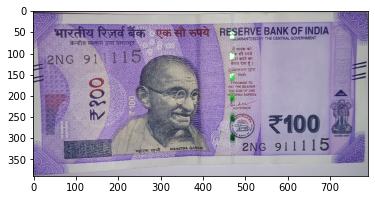

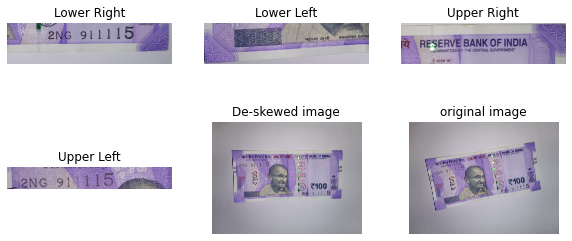

In [18]:
# MASTER FUNCTION CALL
start_time = time.monotonic()

captured_serial_number = SERIAL_NUMBER_EXTRACTION("100_re_skew", 1) # MASTER MODULE FUNCTION CALL

end_time = time.monotonic()
time_format = timedelta(seconds=end_time - start_time)
run_time(time_format)

print("SERIAL NUMBER | ", captured_serial_number)

In [ ]:
from tqdm import tqdm
for i in tqdm(range(int(9e6))):
	pass

In [ ]:
import time
from datetime import timedelta
start_time = time.monotonic()
end_time = time.monotonic()
print(timedelta(seconds=end_time - start_time))